In [40]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torchvision

%matplotlib inline

## Opening the dataset

In [46]:
data = np.load('recycle_data_shuffled.npz')
x, y = data['x_train'], data['y_train']
y = y[:, 0] 

In [37]:
classes = np.sort(np.unique(y))
x[np.argwhere(y == 0)[:, 0]].shape

images = dict()
for c in classes:
    images[c] = x[np.argwhere(y == c)[:, 0]]

In [38]:
print(f"this dataset contains {y.shape[0]} images with dimensionality {x.shape[1:]}")
print(f"It has {classes.shape[0]} classes, where each of them contain {[x.shape[0] for x in images.values()]} observations")
print(f"And, It's values is in between [{x.min()},{x.max()}] interval.")

this dataset contains 9200 images with dimensionality (128, 128, 3)
It has 5 classes, where each of them contain [1840, 1840, 1840, 1840, 1840] observations
And, It's values is in between [0,255] interval.


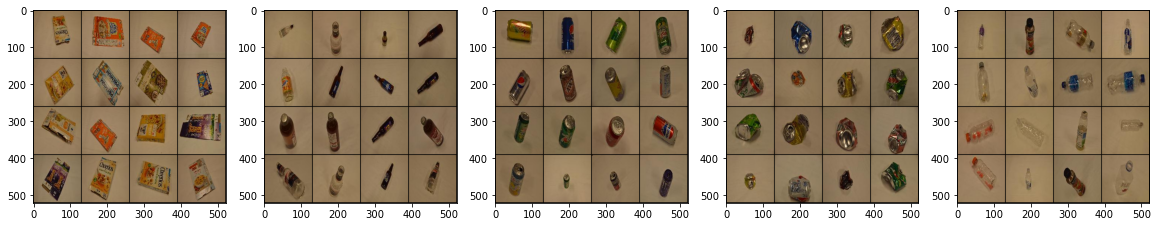

In [39]:
plt.figure(figsize=(20, 10))
for i, c in enumerate(classes):
    j = np.random.randint(0, 1840, 16)
    x = images[c][j, ...].transpose(0, 3, 1, 2)

    grid = torchvision.utils.make_grid(torch.from_numpy(x), nrow=4)
    plt.subplot(1, 5, i+1)
    plt.imshow(grid.numpy().transpose(1, 2, 0))

plt.show()

### Save images

In [53]:
class_name = ['boxes', 'glass bottles', 'cans', 'crushed cans', 'plastic bottles']
for i, c in enumerate(y):
    img = Image.fromarray(x[i])
    img.save(os.path.join('raw_dataset', class_name[c], str(i) + '.png'))